# Analysis of restaurant reviews

In this notebook we analyze the Iens restaurant reviews for a city and a specific date.

In case gbq is not working you might need to update the python api client library:

```bash
sudo pip install --upgrade google-api-python-client
```

In [1]:
import pandas as pd
import pandas_gbq as gbq 
import json
import matplotlib
%matplotlib inline
# hide warnings. `gbq.read_gbq()` gives some
import warnings
warnings.filterwarnings('ignore')

In [2]:
# project specifics
PRIVATE_KEY = '../google-credentials/gsdk-credentials.json'
PROJECT_ID = json.load(open(PRIVATE_KEY))['project_id']

In [3]:
# dataset specifics
city = 'amsterdam'
date = '20171228'
bq_table = '_'.join(['iens.iens_comments', city, date])

## Reading from BigQuery

To load a BigQuery table into a Pandas dataframe, all you need is a query, the project_id, and a way to authenticate.

In [4]:
query = "SELECT * FROM {}".format(bq_table)

df = gbq.read_gbq(query, project_id=PROJECT_ID, private_key=PRIVATE_KEY)

Requesting query... ok.
Job ID: job_X-HQ9Xbnd6gCLQgr8ebBN-QfFaTs
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 2; 42% done. Elapsed 10.48 s.
  Got page: 3; 68% done. Elapsed 16.88 s.
  Got page: 4; 86% done. Elapsed 22.43 s.
  Got page: 5; 100% done. Elapsed 26.15 s.
Got 93541 rows.

Total time taken 27.52 s.
Finished at 2017-12-29 09:53:16.


In [5]:
df.shape

(93541, 10)

## Analysis

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['yearmonth'] = df['date'].dt.strftime('%Y-%m')
df['month'] = df['date'].dt.strftime('%m')

In [7]:
df.head()

,name,reserved_online,id,rating_service,date,rating_food,rating_decor,reviewer,rating,comment,yearmonth,month
0,Dynasty,False,219781,7,2012-09-12,9,8,Diede van O.,8.3,Heerlijke aziatische gerechten. Vooral de 'Sec...,2012-09,09
1,Dynasty,False,219781,7,2013-04-12,9,8,Cecilia V.,8.3,Echt een restaurant om lekker een avondje lang...,2013-04,04
2,Levant,True,220293,9,2016-02-05,8,8,Kirsten D.,8.3,Het restaurant oogt erg chique. Personeel is e...,2016-02,02
3,Levant,False,220293,9,2014-02-01,8,8,Peter T.,8.3,Zaterdagavond hier gegeten. De ontvangst was h...,2014-02,02
4,Levant,True,220293,9,2016-02-13,8,8,Daphne D.,8.3,"Relaxte sfeer, heerlijk en smaakvol eten! Fijn...",2016-02,02


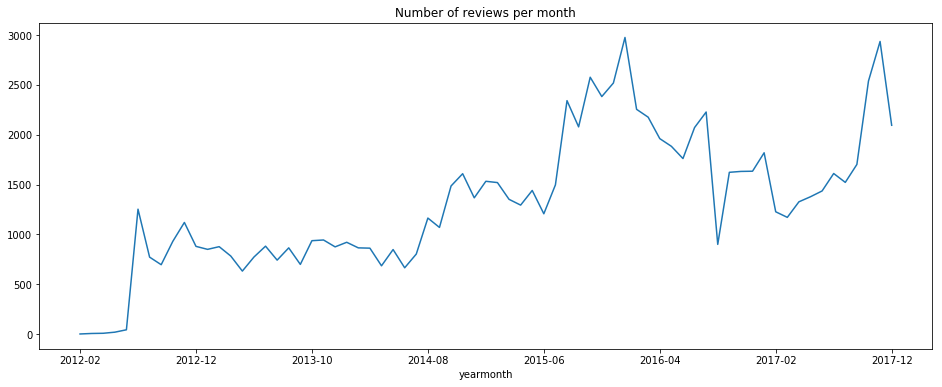

In [8]:
(
    df
    .assign(nr_reviews=1)
    .groupby('yearmonth')
    .agg({'nr_reviews' : sum})
).nr_reviews.plot(figsize=(16,6), title='Number of reviews per month');